In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.core.display import display, HTML

from datetime import datetime

In [ ]:
df = pd.read_csv("/content/waterquality.csv")

In [ ]:
df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000


In [ ]:
df.isna().sum()

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64

In [ ]:
for i in df.columns[1:]:
    df[i] = df[i].fillna(df[i].median())

In [ ]:
fig = px.line(df, x=df.columns[0], y=df.columns[1:][0])
fig.show()
for i in range(0, len(df.columns[2:]), 2):
    fig = px.line(df, x=df.columns[0], y=df.columns[2:][i:i+2])
    fig.show()

In [ ]:
df.dropna(inplace=True)

In [ ]:
def convert_dates(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return [date.year, date.month]

In [ ]:
df["Year"] = df["Date"].apply(lambda x: convert_dates(x)[0])
df["Month"] = df["Date"].apply(lambda x: convert_dates(x)[1])

In [ ]:
def bar_label(axes, _type="edge", rotation=0):
    for container in axes.containers:
        axes.bar_label(container, label_type=_type, rotation=rotation)

In [ ]:
months = ["January", "February", "March",
         "April", "May", "June",
         "July", "August", "September",
         "October", "November", "December"]

In [ ]:
def plots(df, name, num, axes, month=False):
    grouped = df.groupby(name)
    mean = pd.DataFrame(grouped[num].mean())
    mean["id"] = mean.index.tolist()
    if month:
        for i in range(len(mean)):
            mean.iloc[i, 1] = months[mean.iloc[i, 1]-1]
    sns.barplot(x=mean.iloc[:, 1], y=mean.iloc[:, 0], ax=axes)

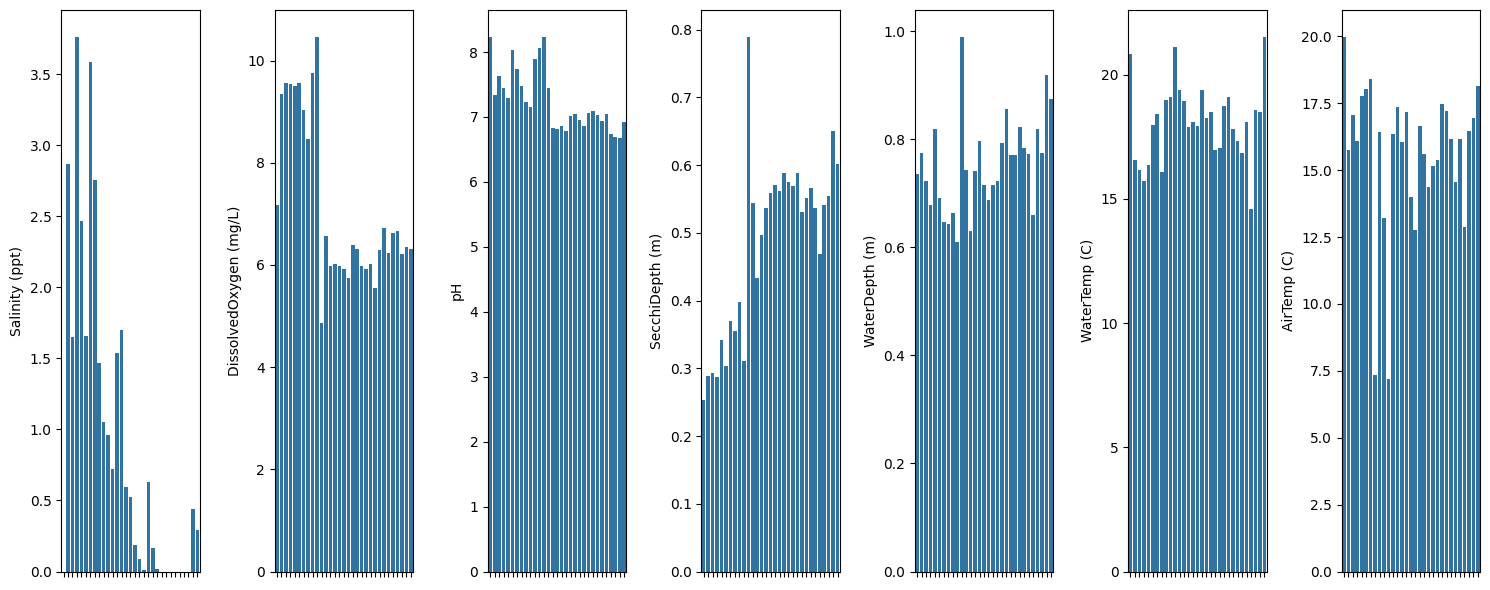

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
for i, j in enumerate(df.columns[1:-2]):
    plots(df, "Year", j, axes[i])
    axes[i].set_xticklabels(())
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

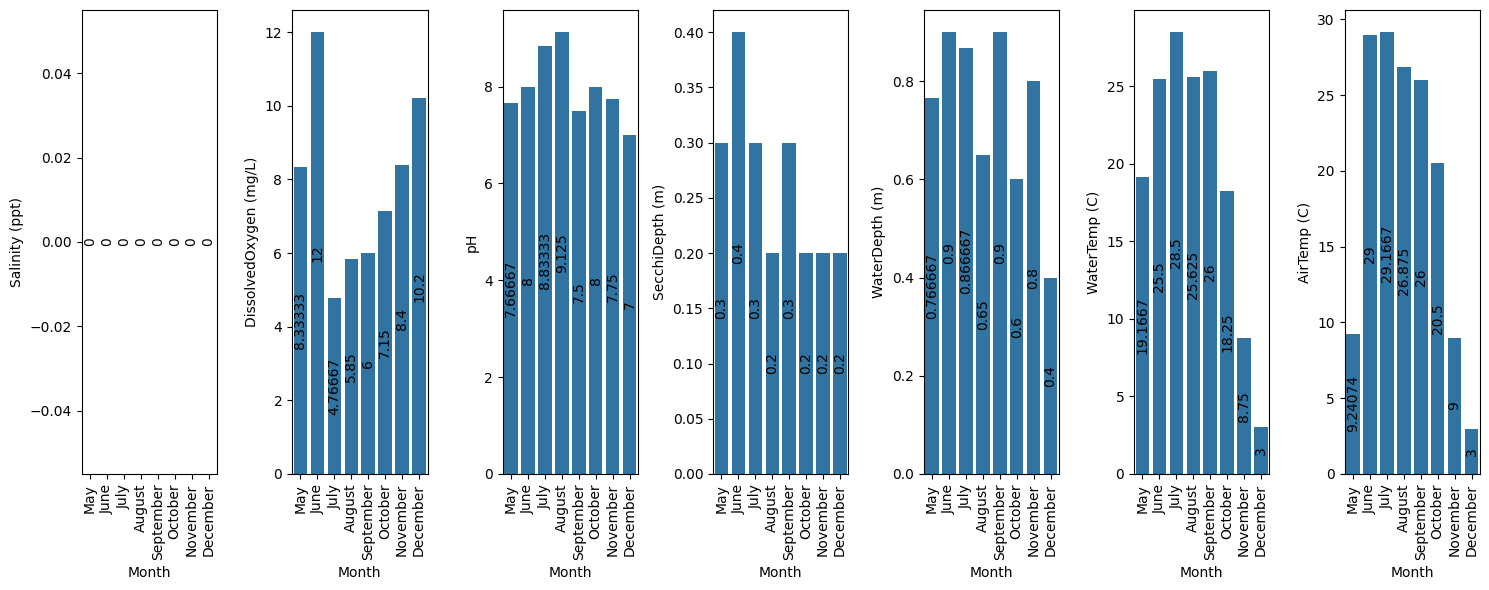

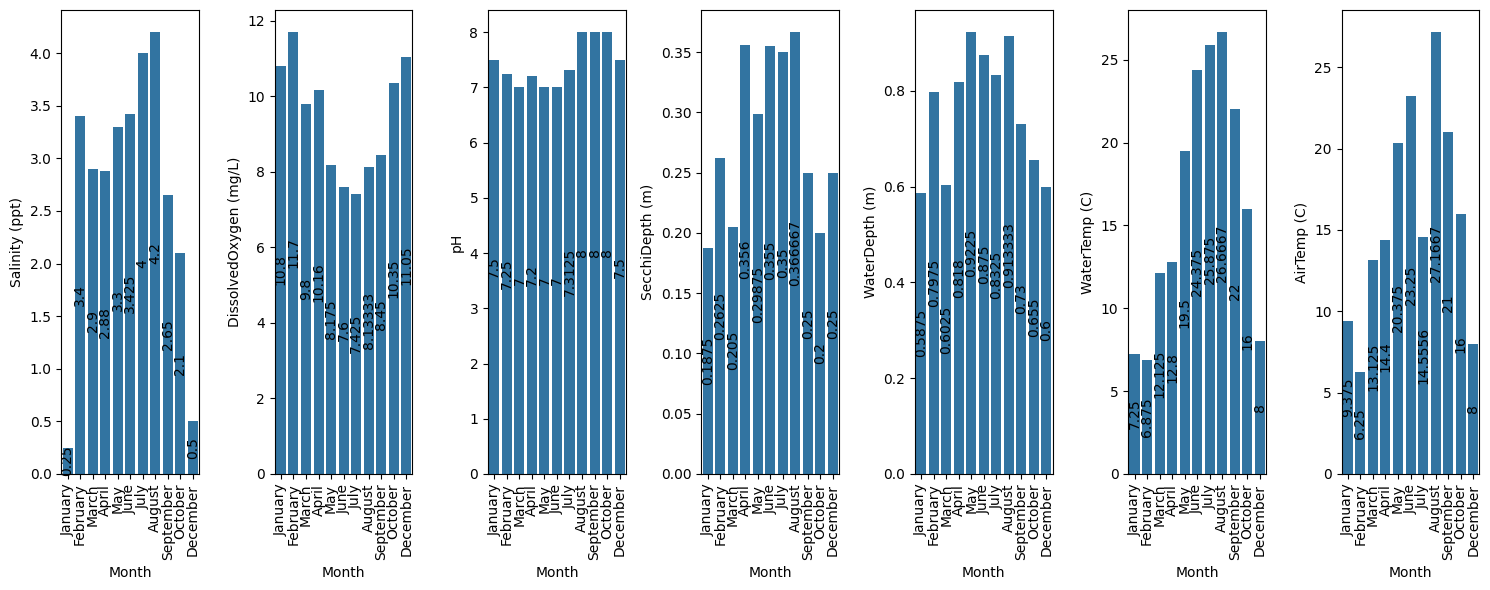

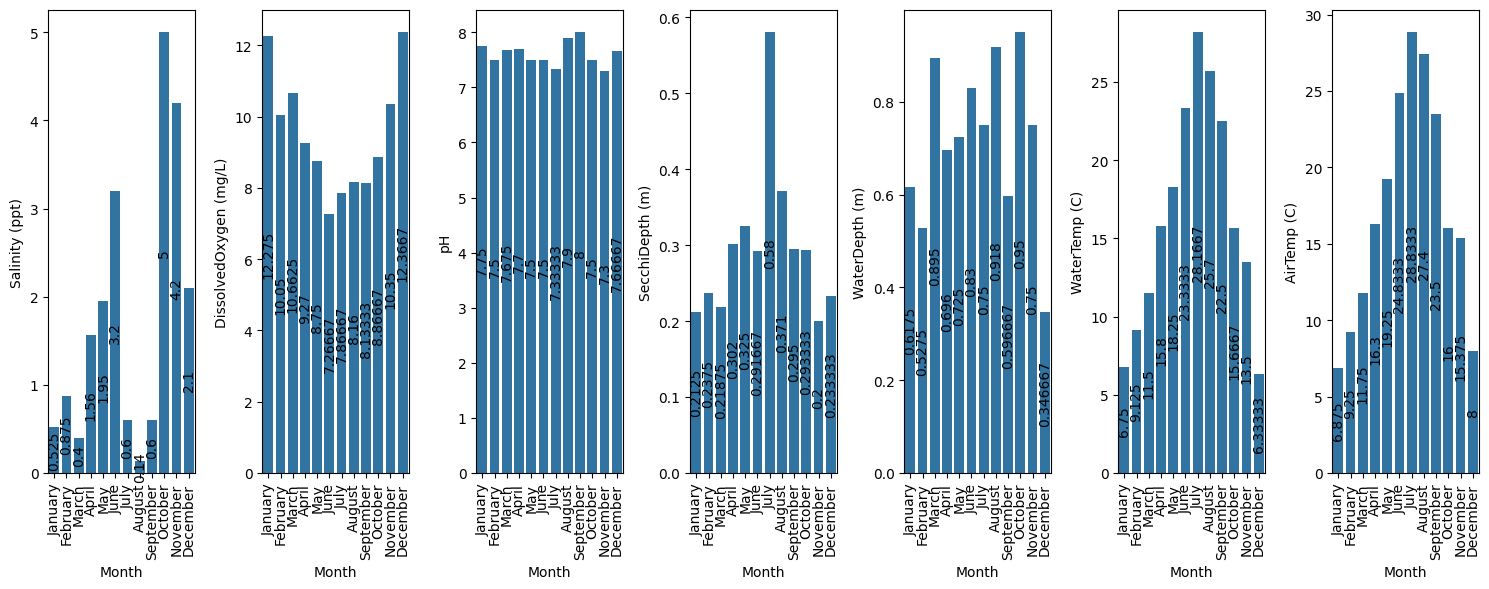

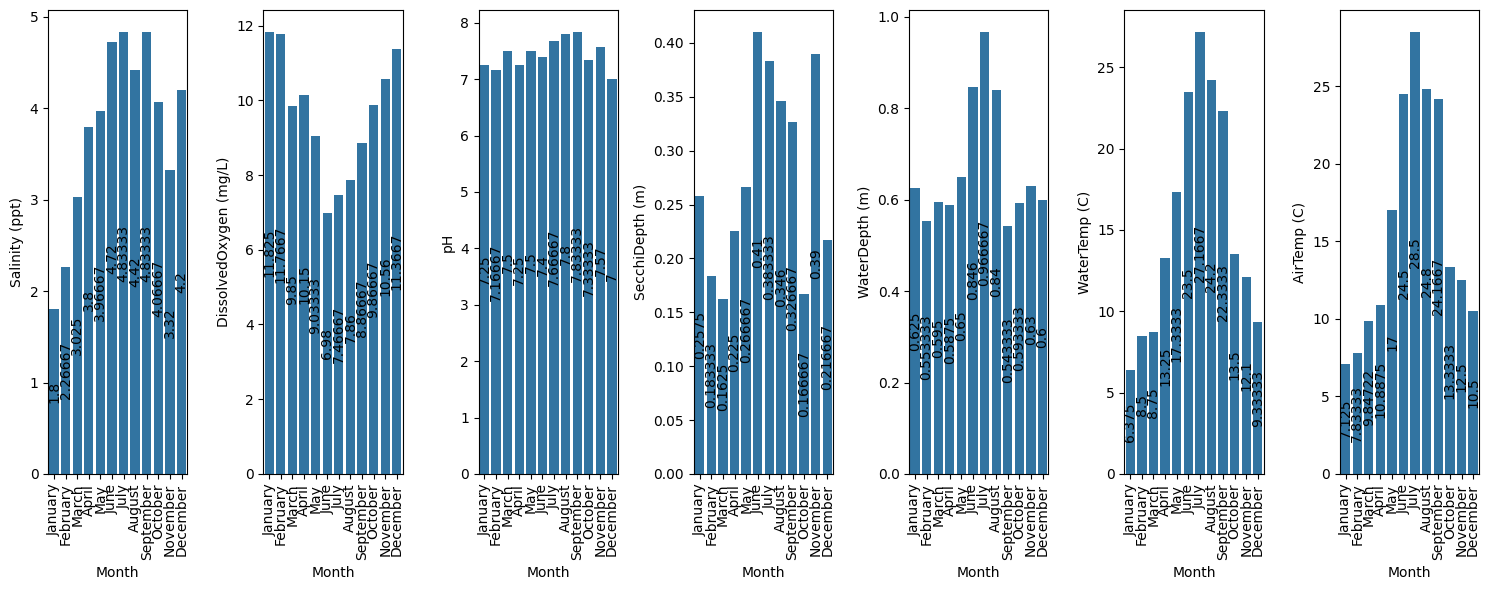

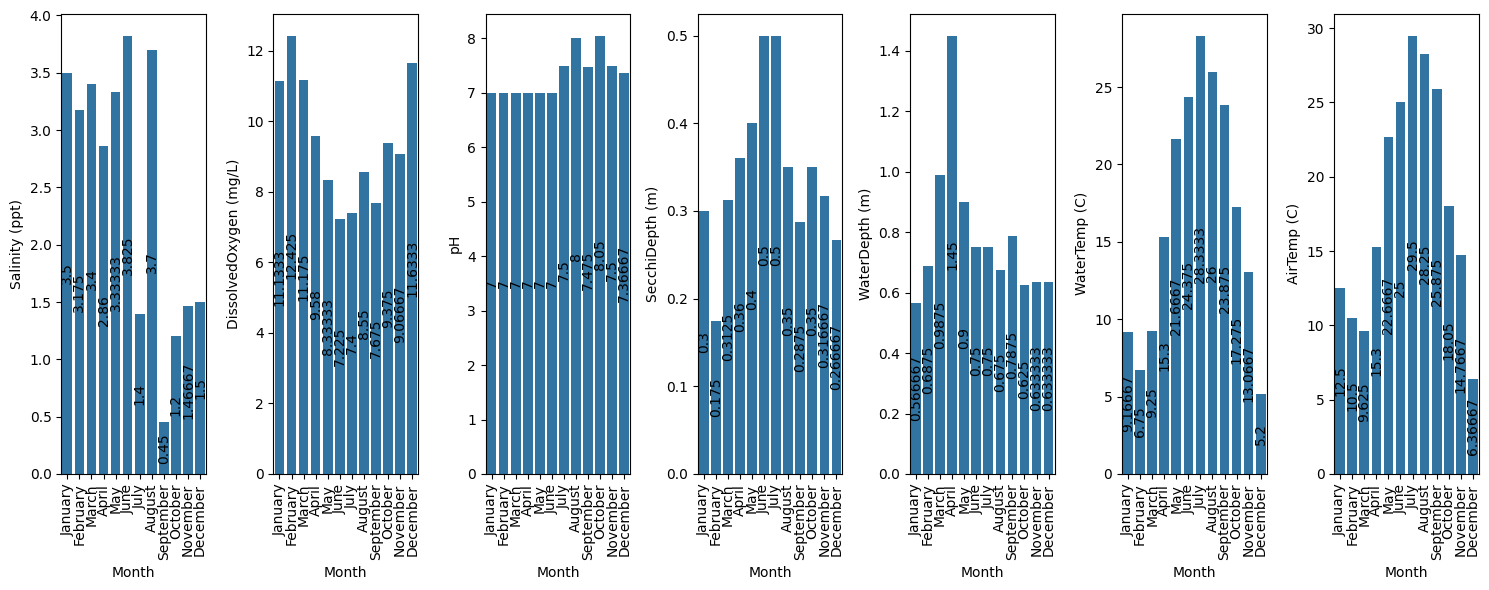

In [ ]:
years = df["Year"].unique()
years = sorted(years)

for i in years[:5]:
    display(HTML("<h2>Monthly water quality distribution for {}</h2>".format(i)))
    temp_df = df[df["Year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
    for j, k in enumerate(df.columns[1:-2]):
        plots(temp_df, "Month", k, axes[j], True)
        bar_label(axes[j], "center", 90)
        axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=90)
        axes[j].set_xlabel("Month")
    plt.tight_layout()
    plt.show()

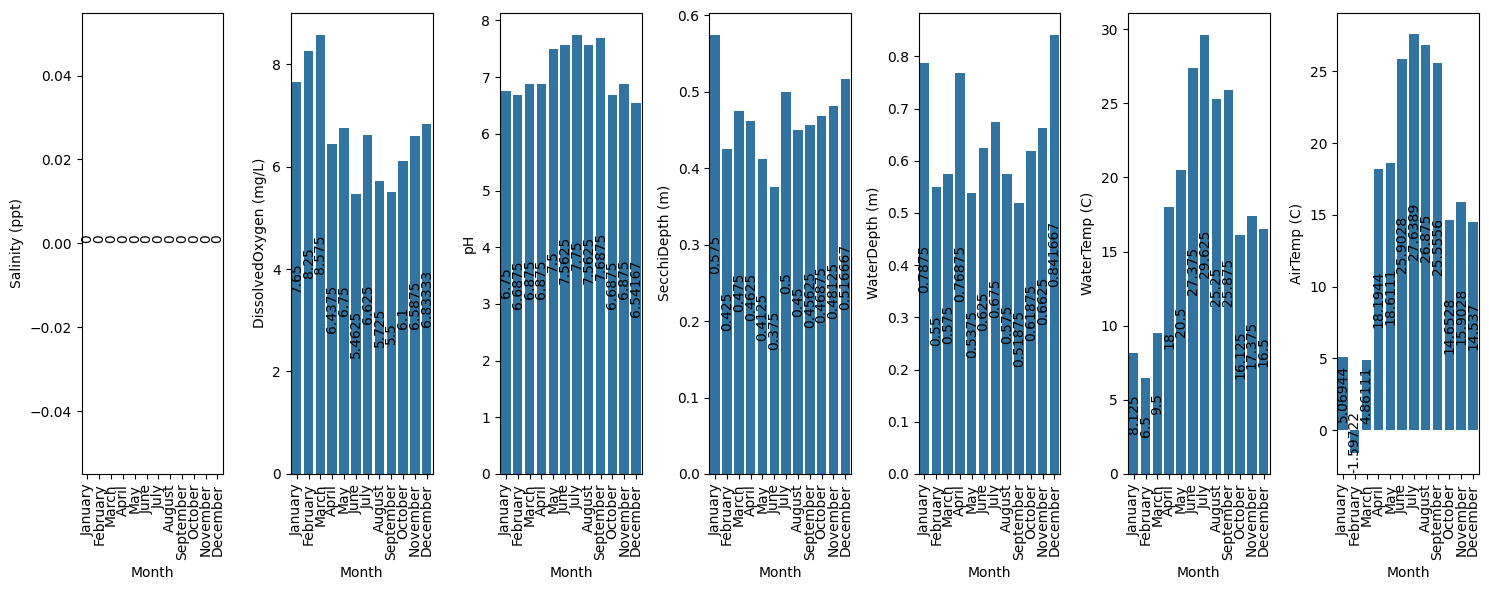

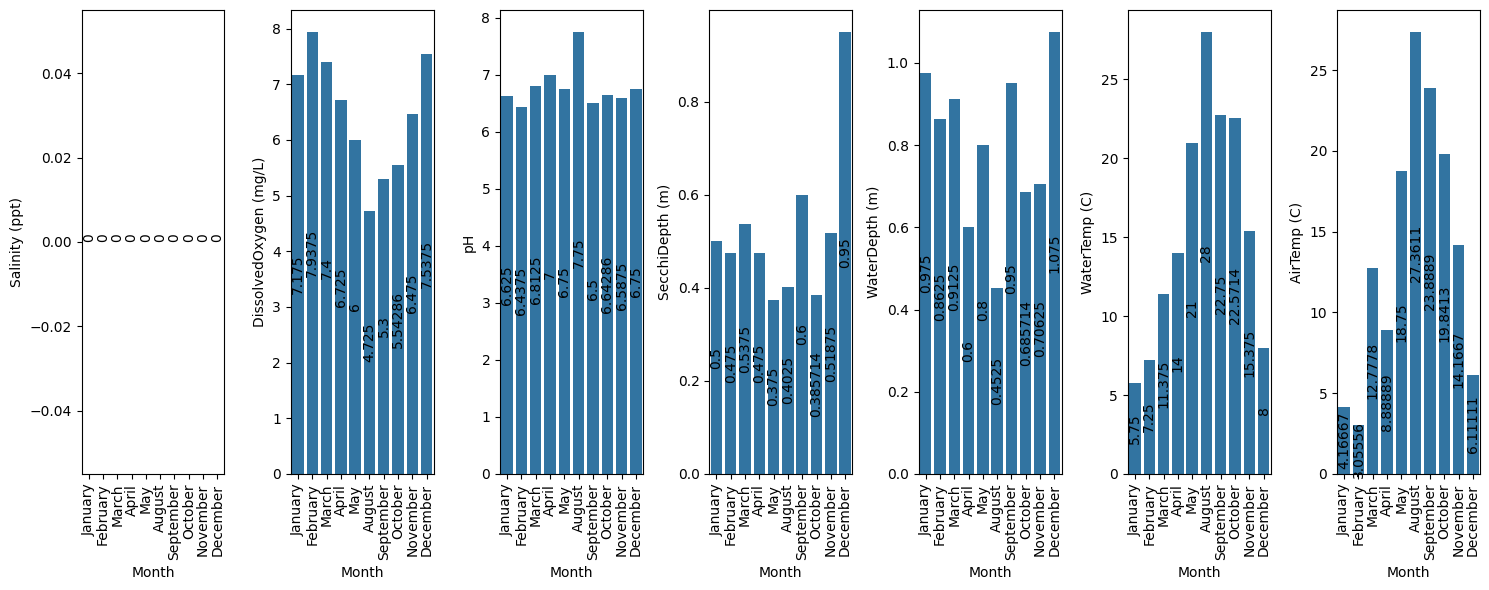

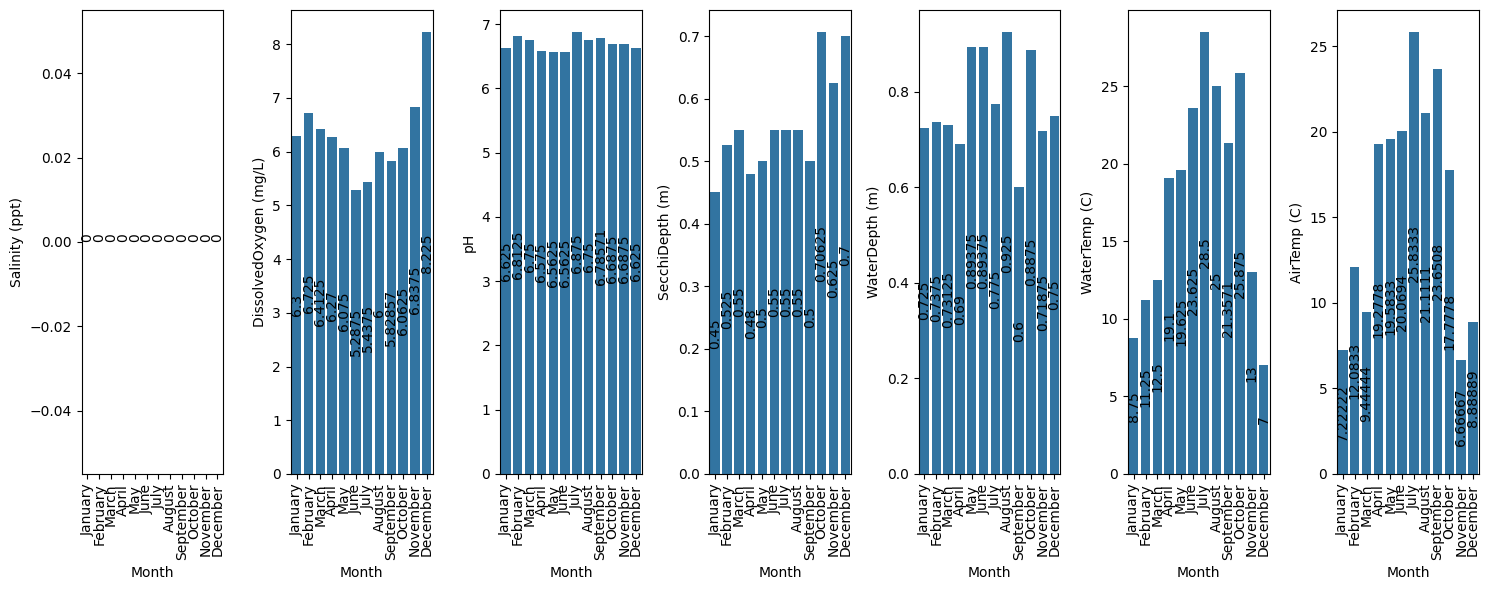

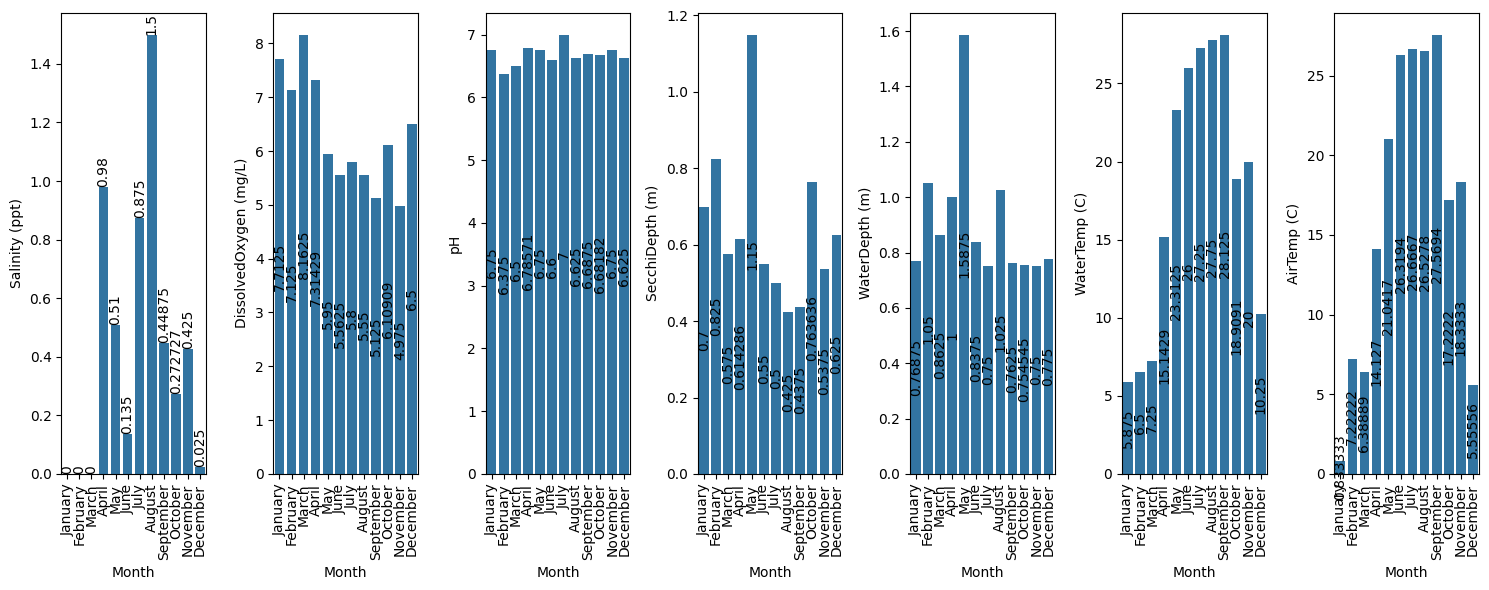

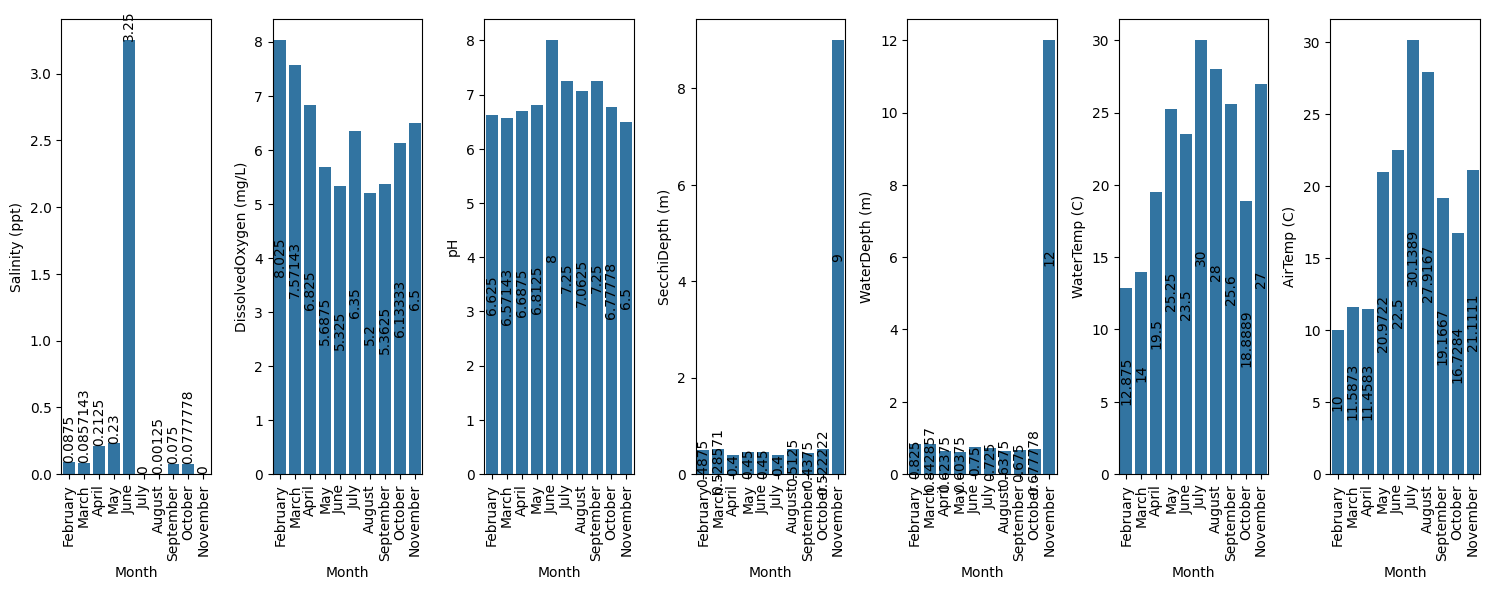

In [ ]:
years = df["Year"].unique()
years = sorted(years)

for i in years[-5:]:
    display(HTML("<h2>Monthly water quality distribution for {}</h2>".format(i)))
    temp_df = df[df["Year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
    for j, k in enumerate(df.columns[1:-2]):
        plots(temp_df, "Month", k, axes[j], True)
        align = "edge"
        if j != 0:
            align = "center"
        bar_label(axes[j], align, 90)
        axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=90)
        axes[j].set_xlabel("Month")
    plt.tight_layout()
    plt.show()